<a id="section-zero"></a>
# Adult Census Income

Adult Census Income data was extracted from the 1994 Census bureau database https://www.kaggle.com/datasets/uciml/adult-census-income The prediction task is to determine whether a person makes over $50K a year.


Table of Contents:

* [Libraries and Initialization](#section-two)
* [Exploratory Data Analysis](#section-three)
* [Imputing, Scaling and Feature Engineering](#section-four)
* [Modeling and Hyperparameter Tuning](#section-five)
* [Conclusion](#section-six)


<a id="section-two"></a>
# Libraries and Initialization

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter  
import matplotlib.patches
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from operator import itemgetter
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
data = pd.read_csv('/kaggle/input/adult-census-income/adult.csv')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

/kaggle/input/adult-census-income/adult.csv


<a href="#section-zero">Start of page</a>

<a id="section-three"></a>
# Exploratory Data Analysis

In [2]:
data.head(20)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [3]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Data Distributions

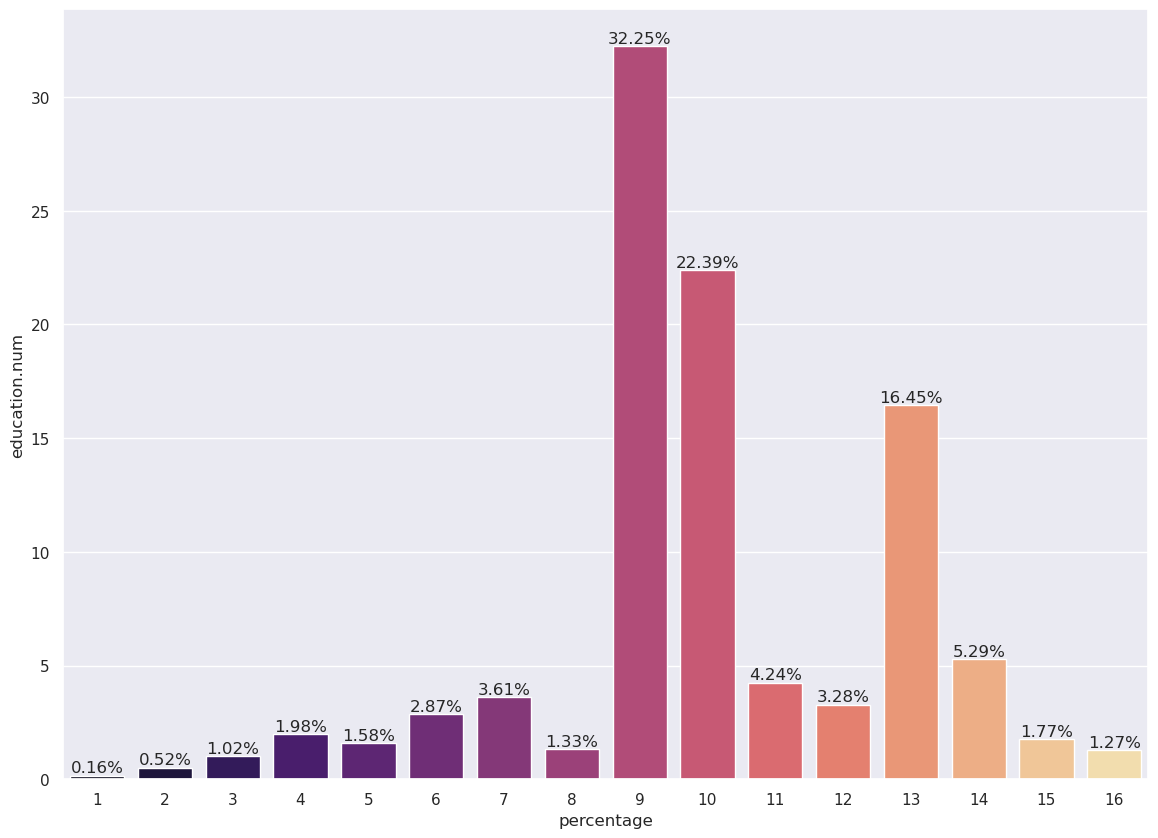

In [4]:
data_list11 = (data['education.num'].value_counts() / len(data) * 100).sort_values(ascending=False)
data11 = pd.DataFrame(data_list11)
data11['Educationnum'] = data11.index
sns.set(rc={'figure.figsize':(14,10)})
ax11 = sns.barplot(data = data11, x = 'Educationnum', y = 'education.num', palette = 'magma') 
ax11.set(xlabel = 'percentage')
ax11.bar_label(ax11.containers[0], fmt='%.2f%%');

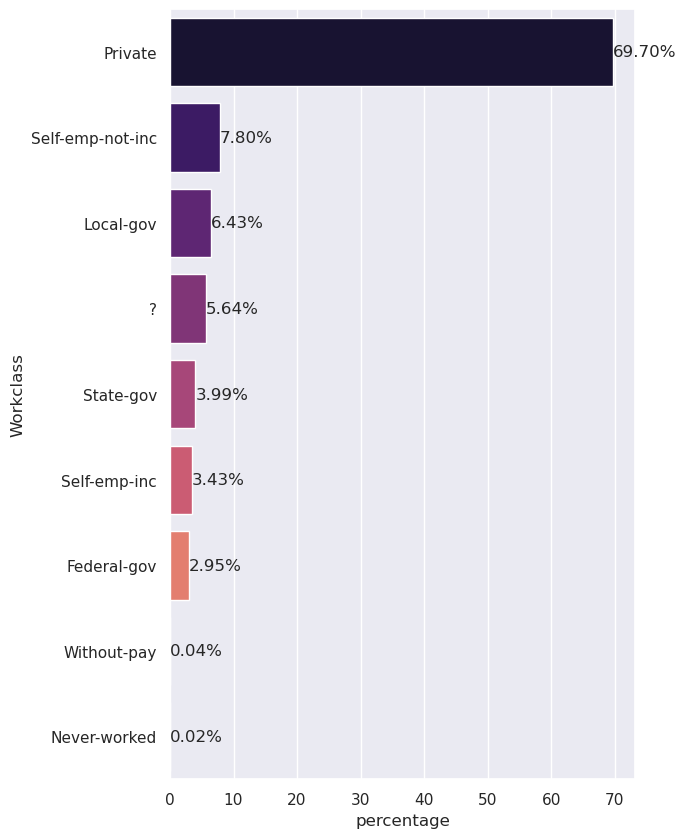

In [5]:
data_list10 = (data['workclass'].value_counts() / len(data) * 100).sort_values(ascending=False)
data10 = pd.DataFrame(data_list10)
data10['Workclass'] = data10.index
sns.set(rc={'figure.figsize':(6,10)})
ax10 = sns.barplot(data = data10, x = 'workclass', y = 'Workclass', palette = 'magma') 
ax10.set(xlabel = 'percentage')
ax10.bar_label(ax10.containers[0], fmt='%.2f%%');

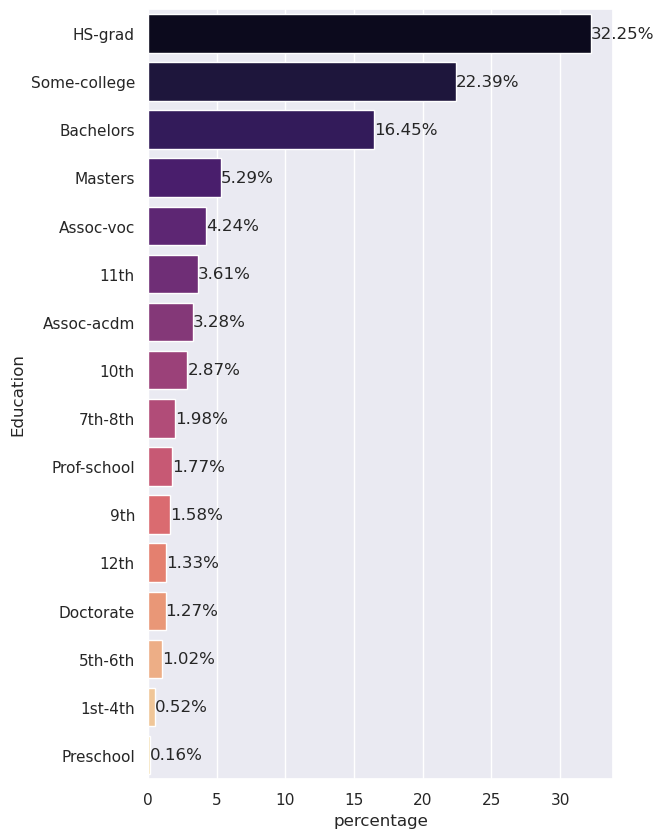

In [6]:
data_list9 = (data['education'].value_counts() / len(data) * 100).sort_values(ascending=False)
data9 = pd.DataFrame(data_list9)
data9['Education'] = data9.index
sns.set(rc={'figure.figsize':(6,10)})
ax9 = sns.barplot(data = data9, x = 'education', y = 'Education', palette = 'magma') 
ax9.set(xlabel = 'percentage')
ax9.bar_label(ax9.containers[0], fmt='%.2f%%');

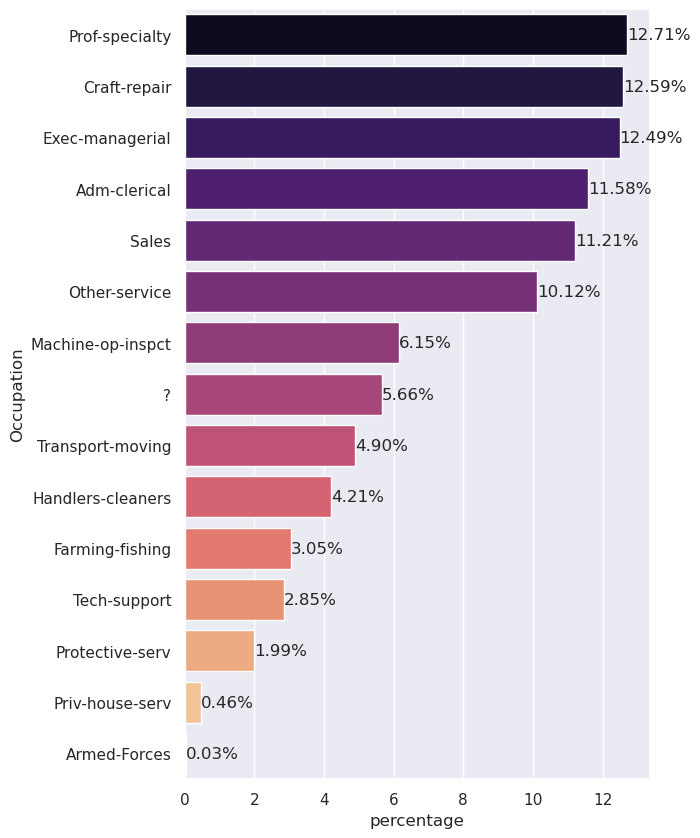

In [7]:
data_list8 = (data['occupation'].value_counts() / len(data) * 100).sort_values(ascending=False)
data8 = pd.DataFrame(data_list8)
data8['Occupation'] = data8.index
sns.set(rc={'figure.figsize':(6,10)})
ax8 = sns.barplot(data = data8, x = 'occupation', y = 'Occupation', palette = 'magma') 
ax8.set(xlabel = 'percentage')
ax8.bar_label(ax8.containers[0], fmt='%.2f%%');

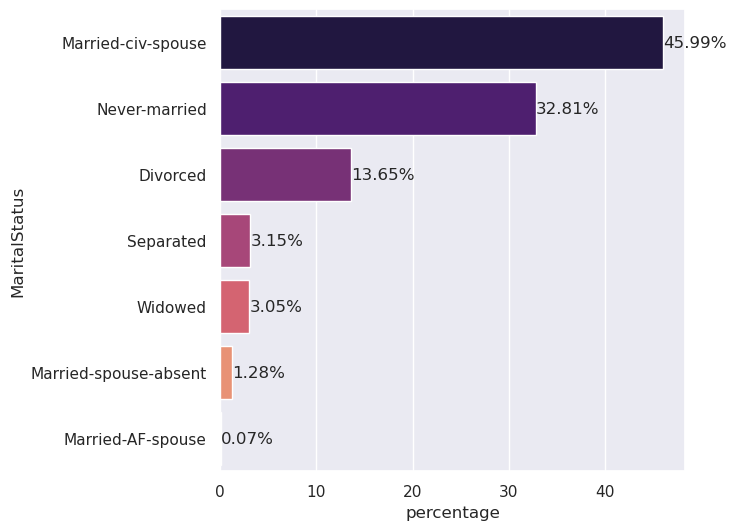

In [8]:
data_list7 = (data['marital.status'].value_counts() / len(data) * 100).sort_values(ascending=False)
data7 = pd.DataFrame(data_list7)
data7['MaritalStatus'] = data7.index
sns.set(rc={'figure.figsize':(6,6)})
ax7 = sns.barplot(data = data7, x = 'marital.status', y = 'MaritalStatus', palette = 'magma') 
ax7.set(xlabel = 'percentage')
ax7.bar_label(ax7.containers[0], fmt='%.2f%%');

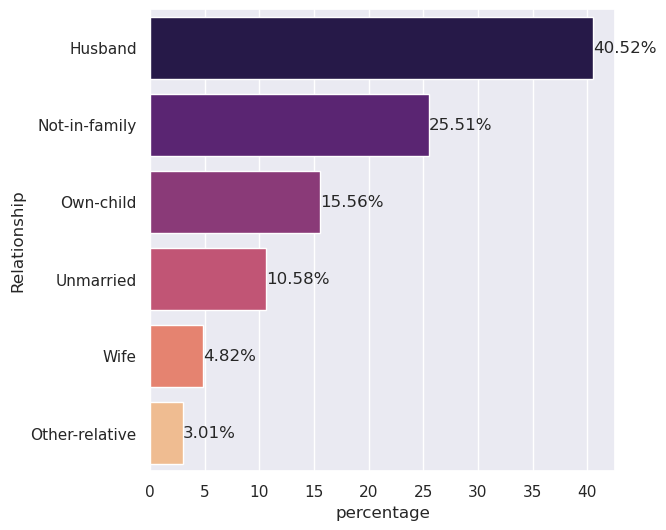

In [9]:
data_list6 = (data['relationship'].value_counts() / len(data) * 100).sort_values(ascending=False)
data6 = pd.DataFrame(data_list6)
data6['Relationship'] = data6.index
sns.set(rc={'figure.figsize':(6,6)})
ax6 = sns.barplot(data = data6, x = 'relationship', y = 'Relationship', palette = 'magma') 
ax6.set(xlabel = 'percentage')
ax6.bar_label(ax6.containers[0], fmt='%.2f%%');

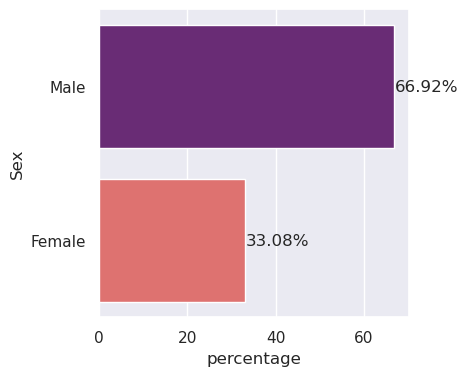

In [10]:
data_list5 = (data['sex'].value_counts() / len(data) * 100).sort_values(ascending=False)
data5 = pd.DataFrame(data_list5)
data5['Sex'] = data5.index
sns.set(rc={'figure.figsize':(4,4)})
ax5 = sns.barplot(data = data5, x = 'sex', y = 'Sex', palette = 'magma') 
ax5.set(xlabel = 'percentage')
ax5.bar_label(ax5.containers[0], fmt='%.2f%%');

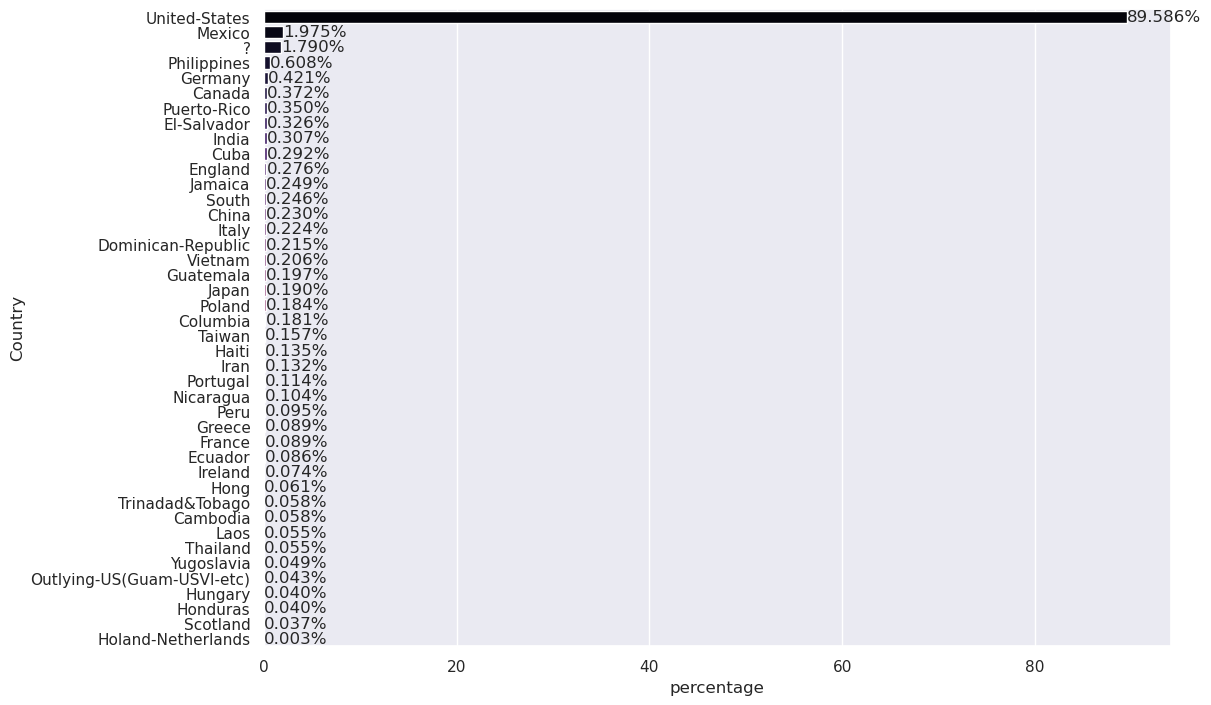

In [11]:
data_list4 = (data['native.country'].value_counts() / len(data) * 100).sort_values(ascending=False)
data4 = pd.DataFrame(data_list4)
data4['Country'] = data4.index
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax4 = sns.barplot(data = data4, x = 'native.country', y = 'Country', palette = 'magma') 
ax4.set(xlabel = 'percentage')
ax4.bar_label(ax4.containers[0], fmt='%.3f%%');

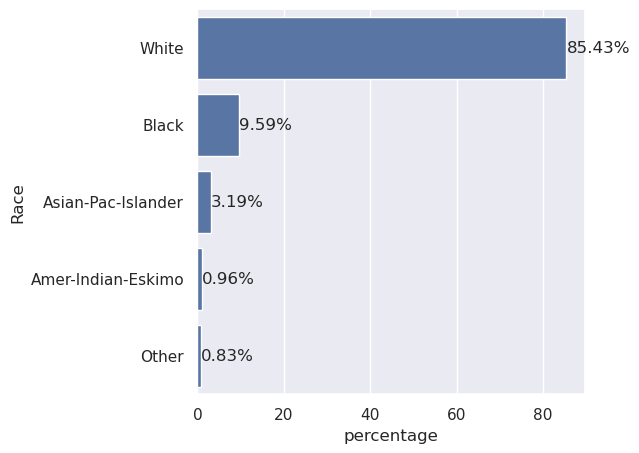

In [12]:
data_list1 = (data['race'].value_counts() / len(data) * 100).sort_values(ascending=False)
data2 = pd.DataFrame(data_list1)
data2['Race'] = data2.index
sns.set(rc={'figure.figsize':(5,5)})
ax3 = sns.barplot(data = data2, x = 'race', y = 'Race', color = 'b') 
ax3.set(xlabel = 'percentage')
ax3.bar_label(ax3.containers[0], fmt='%.2f%%');

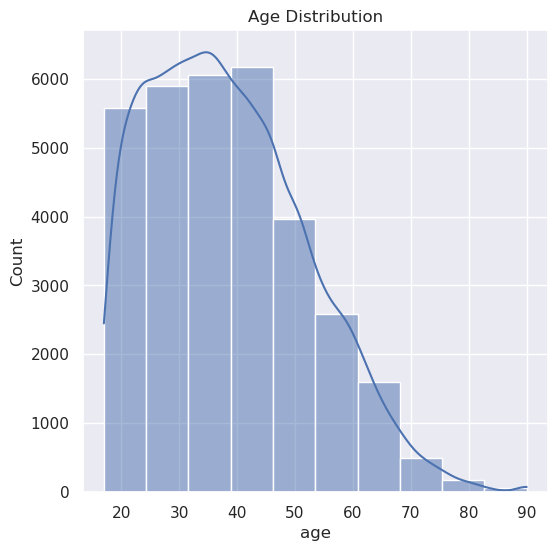

In [13]:
sns.set(rc={'figure.figsize':(6,6)})
sns.histplot(data.age, kde=True, bins = 10).set(title = 'Age Distribution')
plt.show()

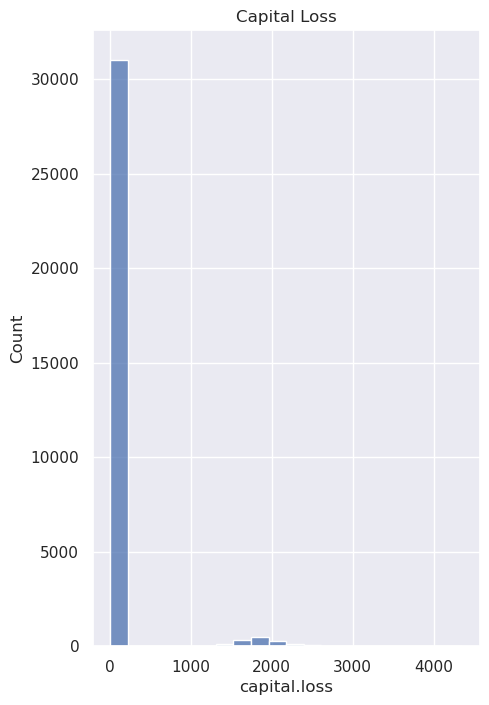

In [14]:
sns.set(rc={'figure.figsize':(5, 8)})
sns.histplot(data['capital.loss'], kde=False, bins = 20).set(title = 'Capital Loss')
plt.show()

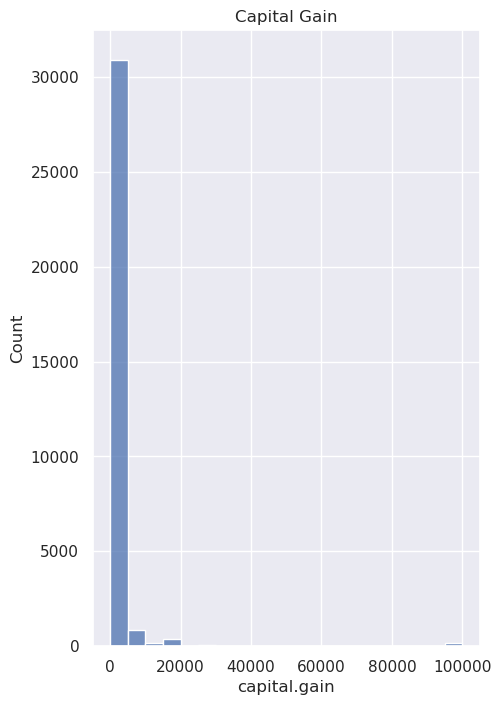

In [15]:
sns.set(rc={'figure.figsize':(5, 8)})
sns.histplot(data['capital.gain'], kde=False, bins = 20).set(title = 'Capital Gain')
plt.show()

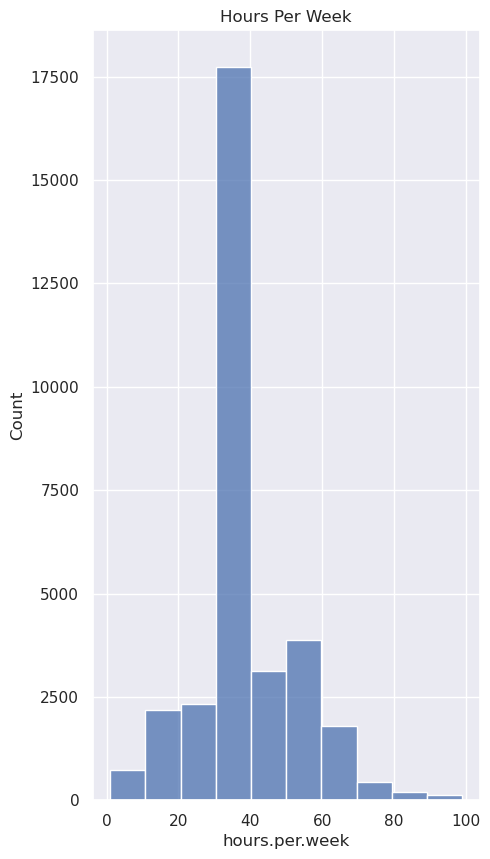

In [16]:
sns.set(rc={'figure.figsize':(5, 10)})
sns.histplot(data['hours.per.week'], kde=False, bins = 10).set(title = 'Hours Per Week')
plt.show()

## Income Distributions

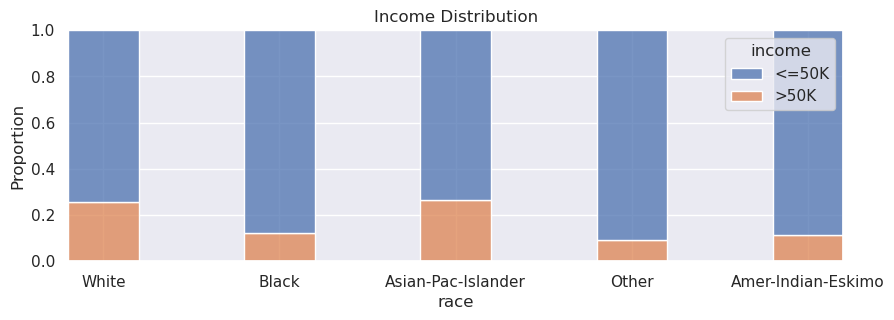

In [17]:
sns.set(rc={'figure.figsize':(10, 3)})
sns.histplot(data = data, x="race", hue="income", multiple="fill", stat="proportion", discrete=True, shrink=.4).set(title = 'Income Distribution');

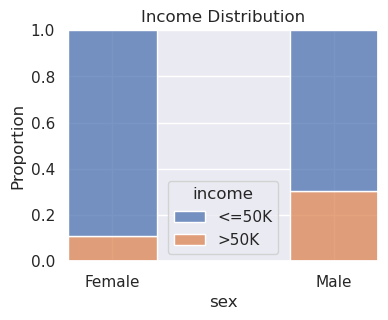

In [18]:
sns.set(rc={'figure.figsize':(4, 3)})
sns.histplot(data = data, x="sex", hue="income", multiple="fill", stat="proportion", discrete=True, shrink=.4).set(title = 'Income Distribution');

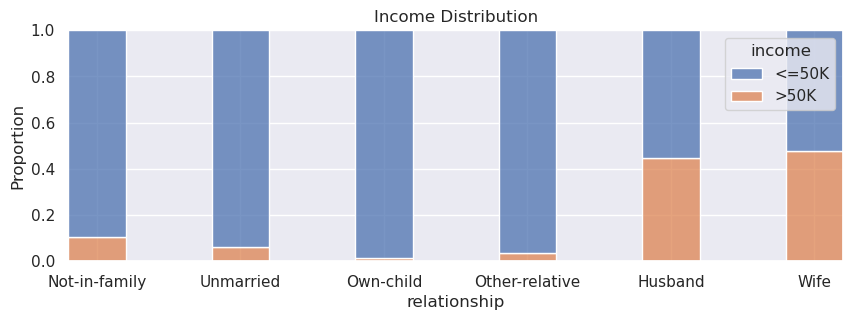

In [19]:
sns.set(rc={'figure.figsize':(10, 3)})
sns.histplot(data = data, x="relationship", hue="income", multiple="fill", stat="proportion", discrete=True, shrink=.4).set(title = 'Income Distribution');

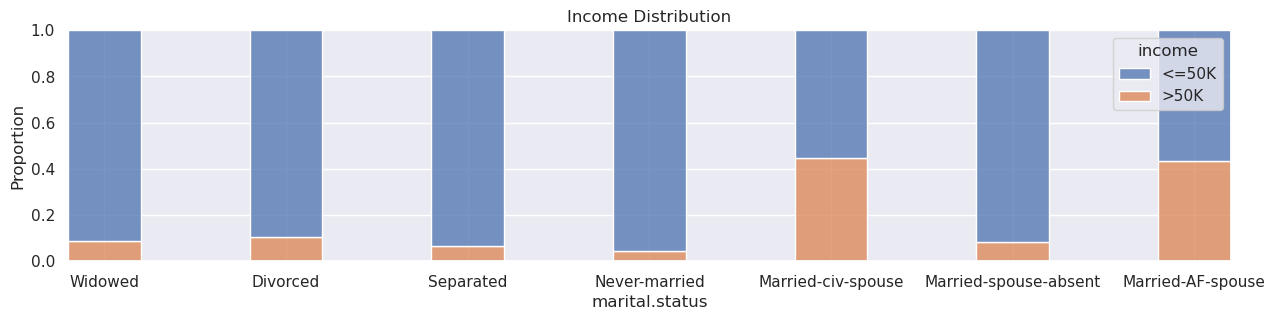

In [20]:
sns.set(rc={'figure.figsize':(15, 3)})
sns.histplot(data = data, x="marital.status", hue="income", multiple="fill", stat="proportion", discrete=True, shrink=.4).set(title = 'Income Distribution');

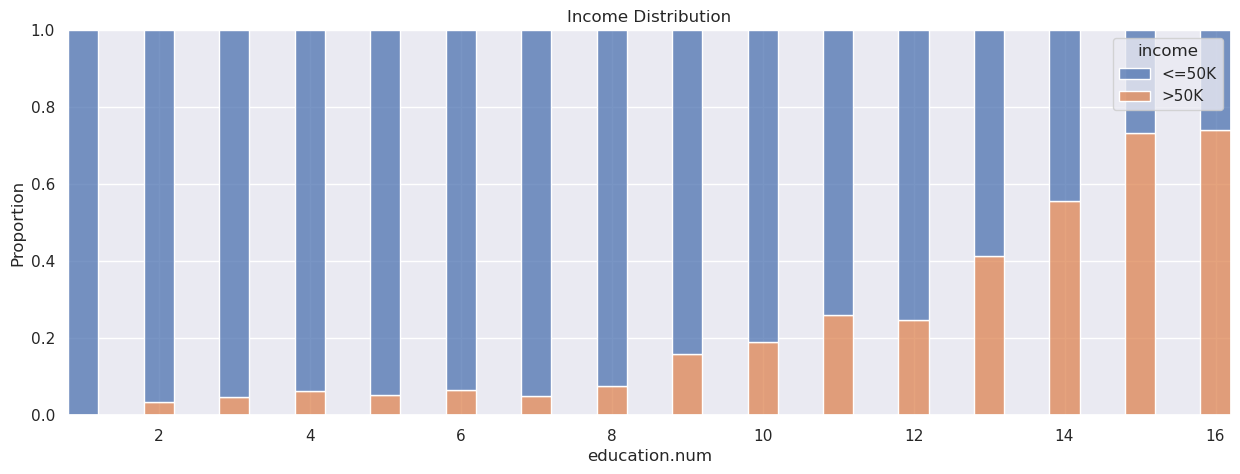

In [21]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.histplot(data = data, x="education.num", hue="income", multiple="fill", stat="proportion", discrete=True, shrink=.4).set(title = 'Income Distribution');

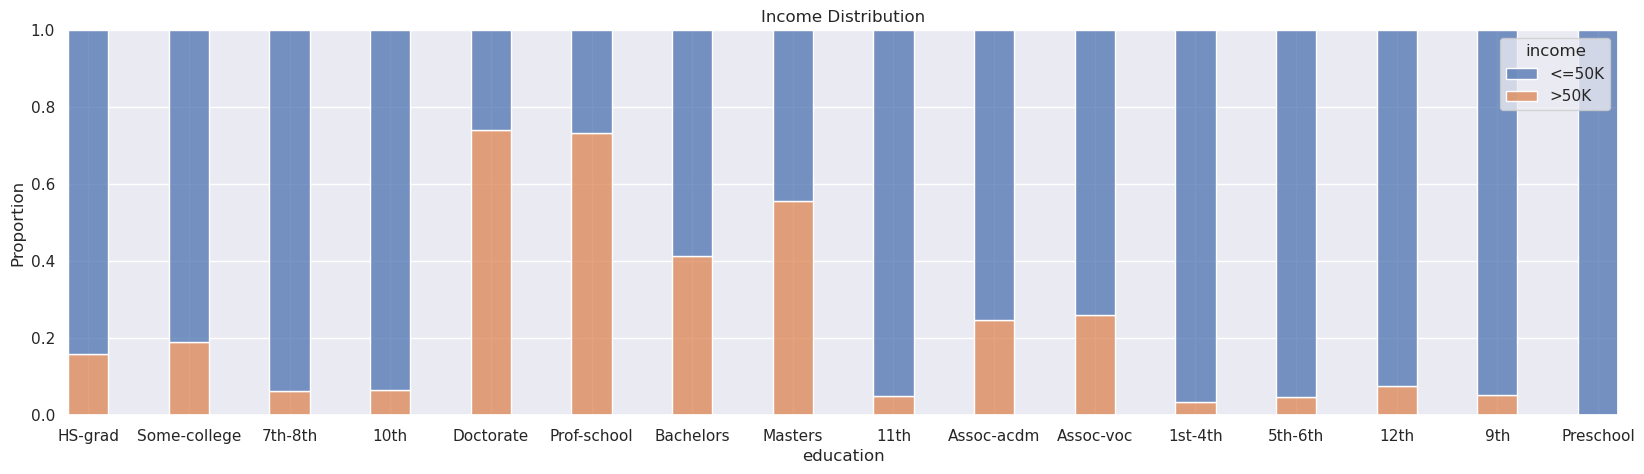

In [22]:
sns.set(rc={'figure.figsize':(20, 5)})
sns.histplot(data = data, x="education", hue="income", multiple="fill", stat="proportion", discrete=True, shrink=.4).set(title = 'Income Distribution');

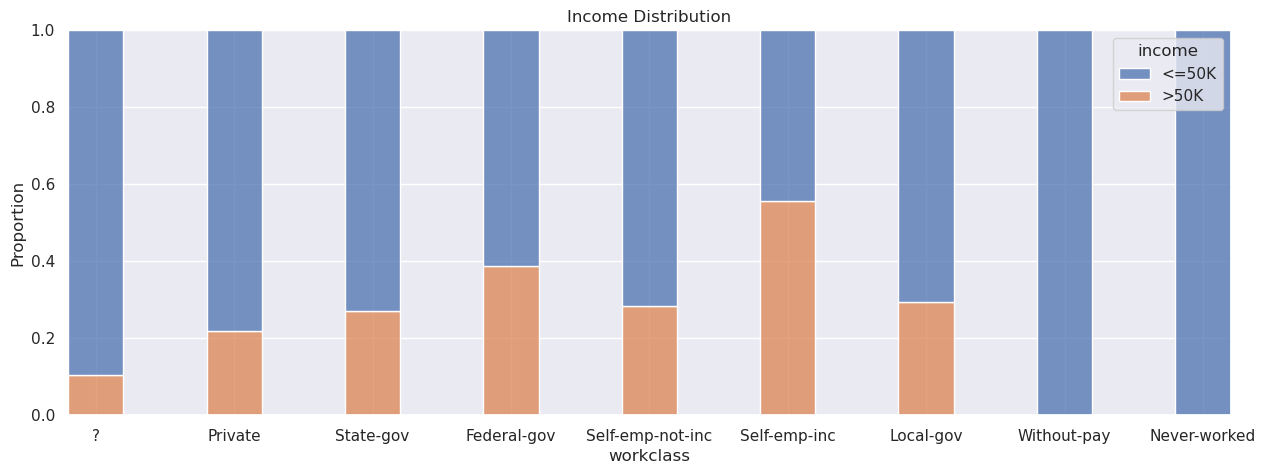

In [23]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.histplot(data = data, x="workclass", hue="income", multiple="fill", stat="proportion", discrete=True, shrink=.4).set(title = 'Income Distribution');

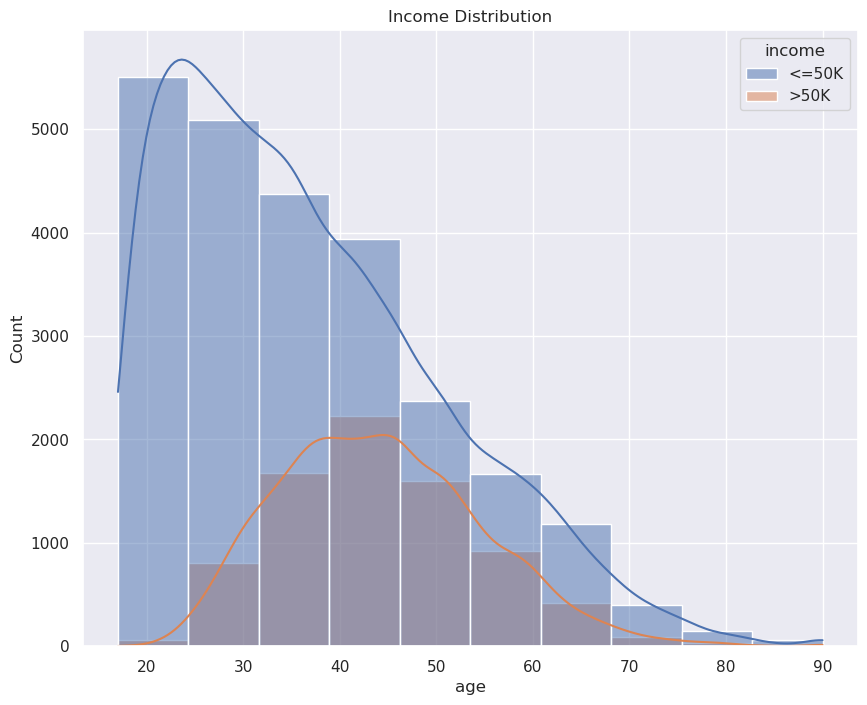

In [24]:
sns.set(rc={'figure.figsize':(10,8)})
sns.histplot(data = data, x = 'age', kde=True, hue = 'income', bins = 10).set(title = 'Income Distribution')
plt.show();

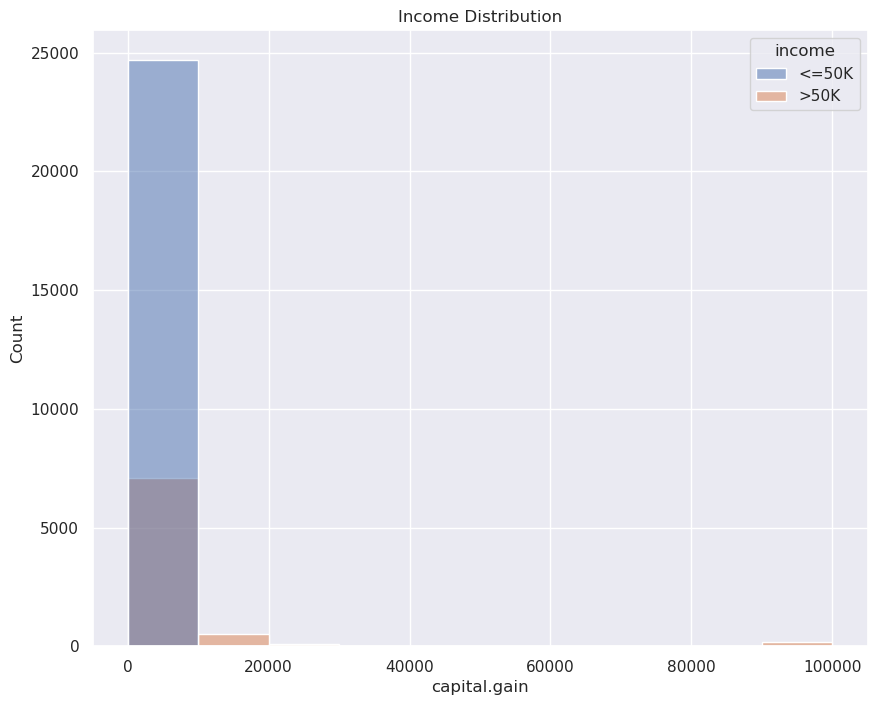

In [25]:
sns.set(rc={'figure.figsize':(10,8)})
sns.histplot(data = data, x = 'capital.gain', kde=False, hue = 'income', bins = 10).set(title = 'Income Distribution')
plt.show();

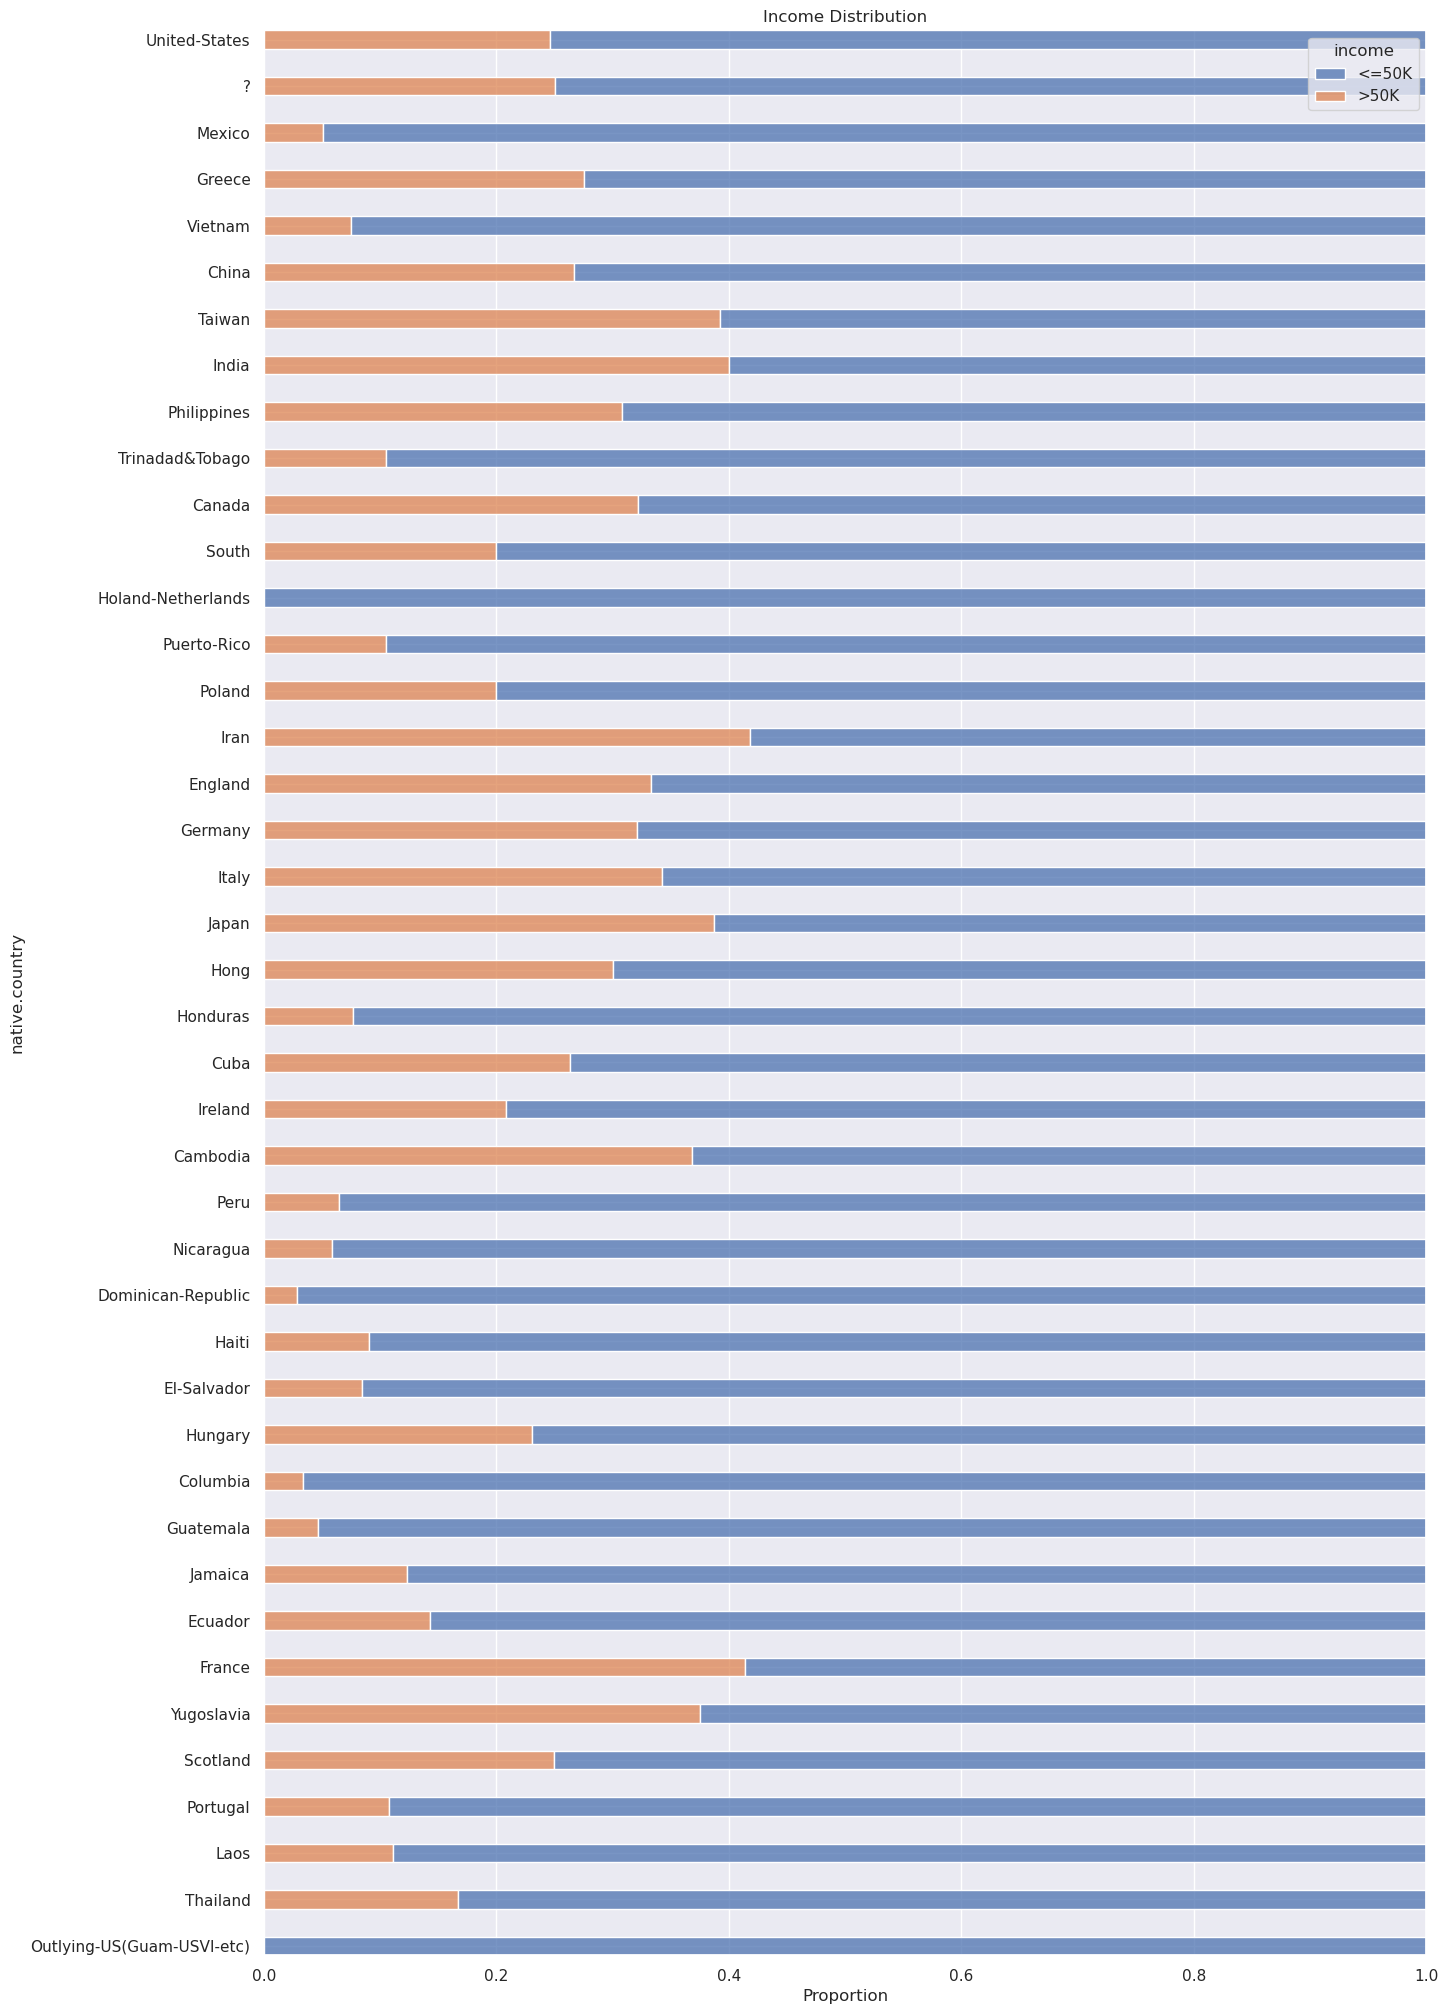

In [26]:
sns.set(rc={'figure.figsize':(15, 25)})
sns.histplot(data = data, y="native.country", hue="income", multiple="fill", stat="proportion", discrete=True, shrink=.4).set(title = 'Income Distribution');

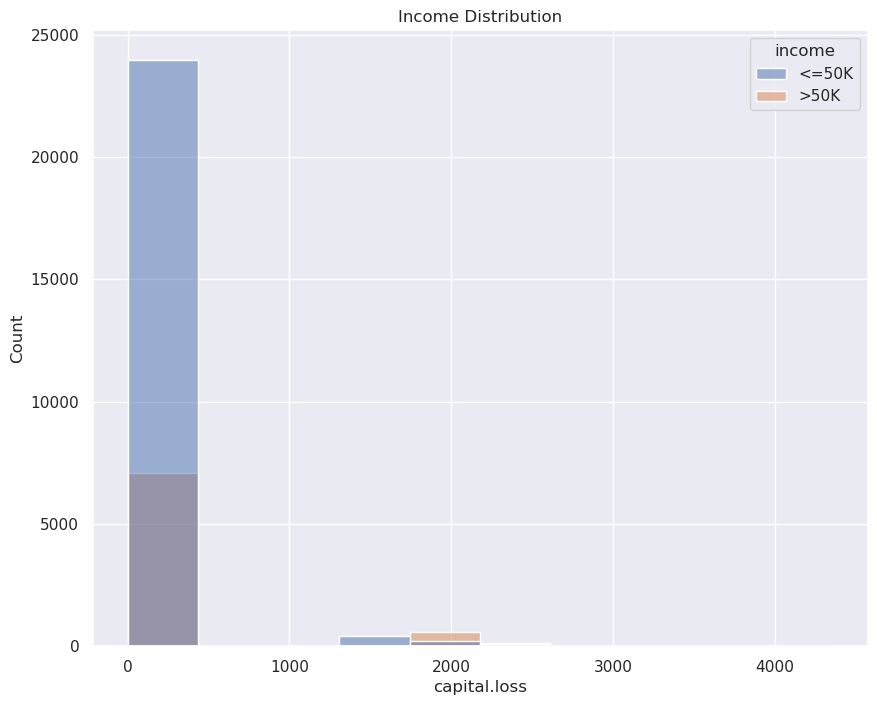

In [27]:
sns.set(rc={'figure.figsize':(10,8)})
sns.histplot(data = data, x = 'capital.loss', kde=False, hue = 'income', bins = 10).set(title = 'Income Distribution')
plt.show();

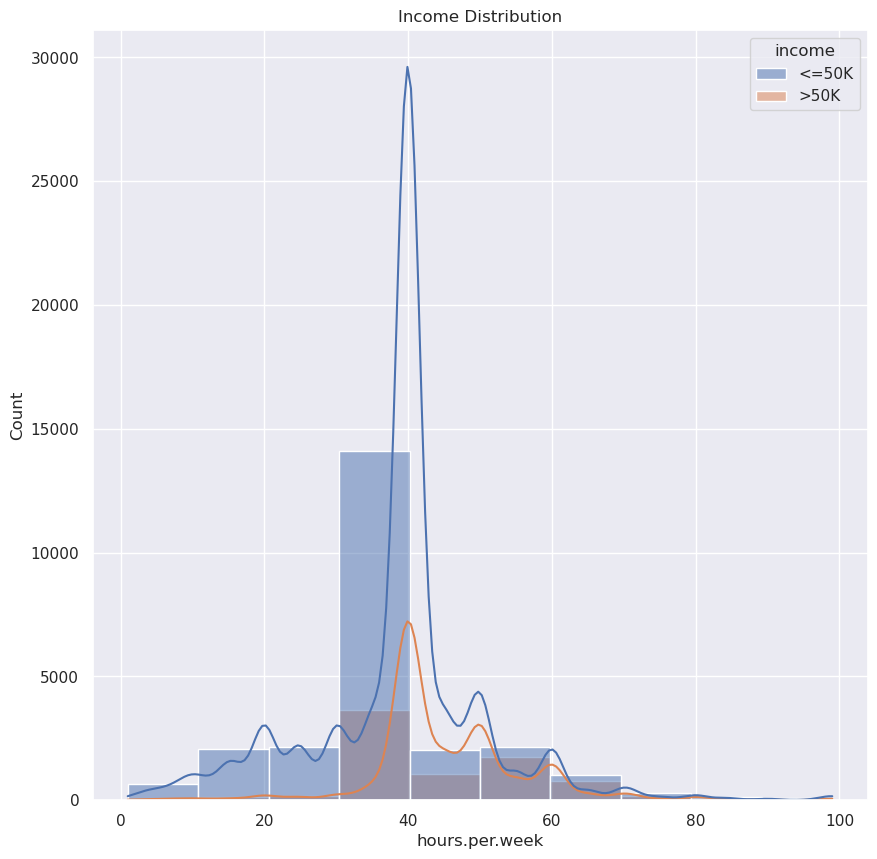

In [28]:
sns.set(rc={'figure.figsize':(10,10)})
sns.histplot(data = data, x = 'hours.per.week', kde=True, hue = 'income', bins = 10).set(title = 'Income Distribution')
plt.show();

                  race     sex income  percentage
12  Amer-Indian-Eskimo  Female  <=50K    0.328614
18  Amer-Indian-Eskimo  Female   >50K    0.036854
10  Amer-Indian-Eskimo    Male  <=50K    0.515955
16  Amer-Indian-Eskimo    Male   >50K    0.073708
7   Asian-Pac-Islander  Female  <=50K    0.930561
15  Asian-Pac-Islander  Female   >50K    0.132060
6   Asian-Pac-Islander    Male  <=50K    1.412733
9   Asian-Pac-Islander    Male   >50K    0.715580
3                Black  Female  <=50K    4.499248
14               Black  Female   >50K    0.276404
4                Black    Male  <=50K    3.906514
8                Black    Male   >50K    0.912134
13               Other  Female  <=50K    0.316329
19               Other  Female   >50K    0.018427
11               Other    Male  <=50K    0.439176
17               Other    Male   >50K    0.058352
1                White  Female  <=50K   23.383803
5                White  Female   >50K    3.157151
0                White    Male  <=50K   40.186112


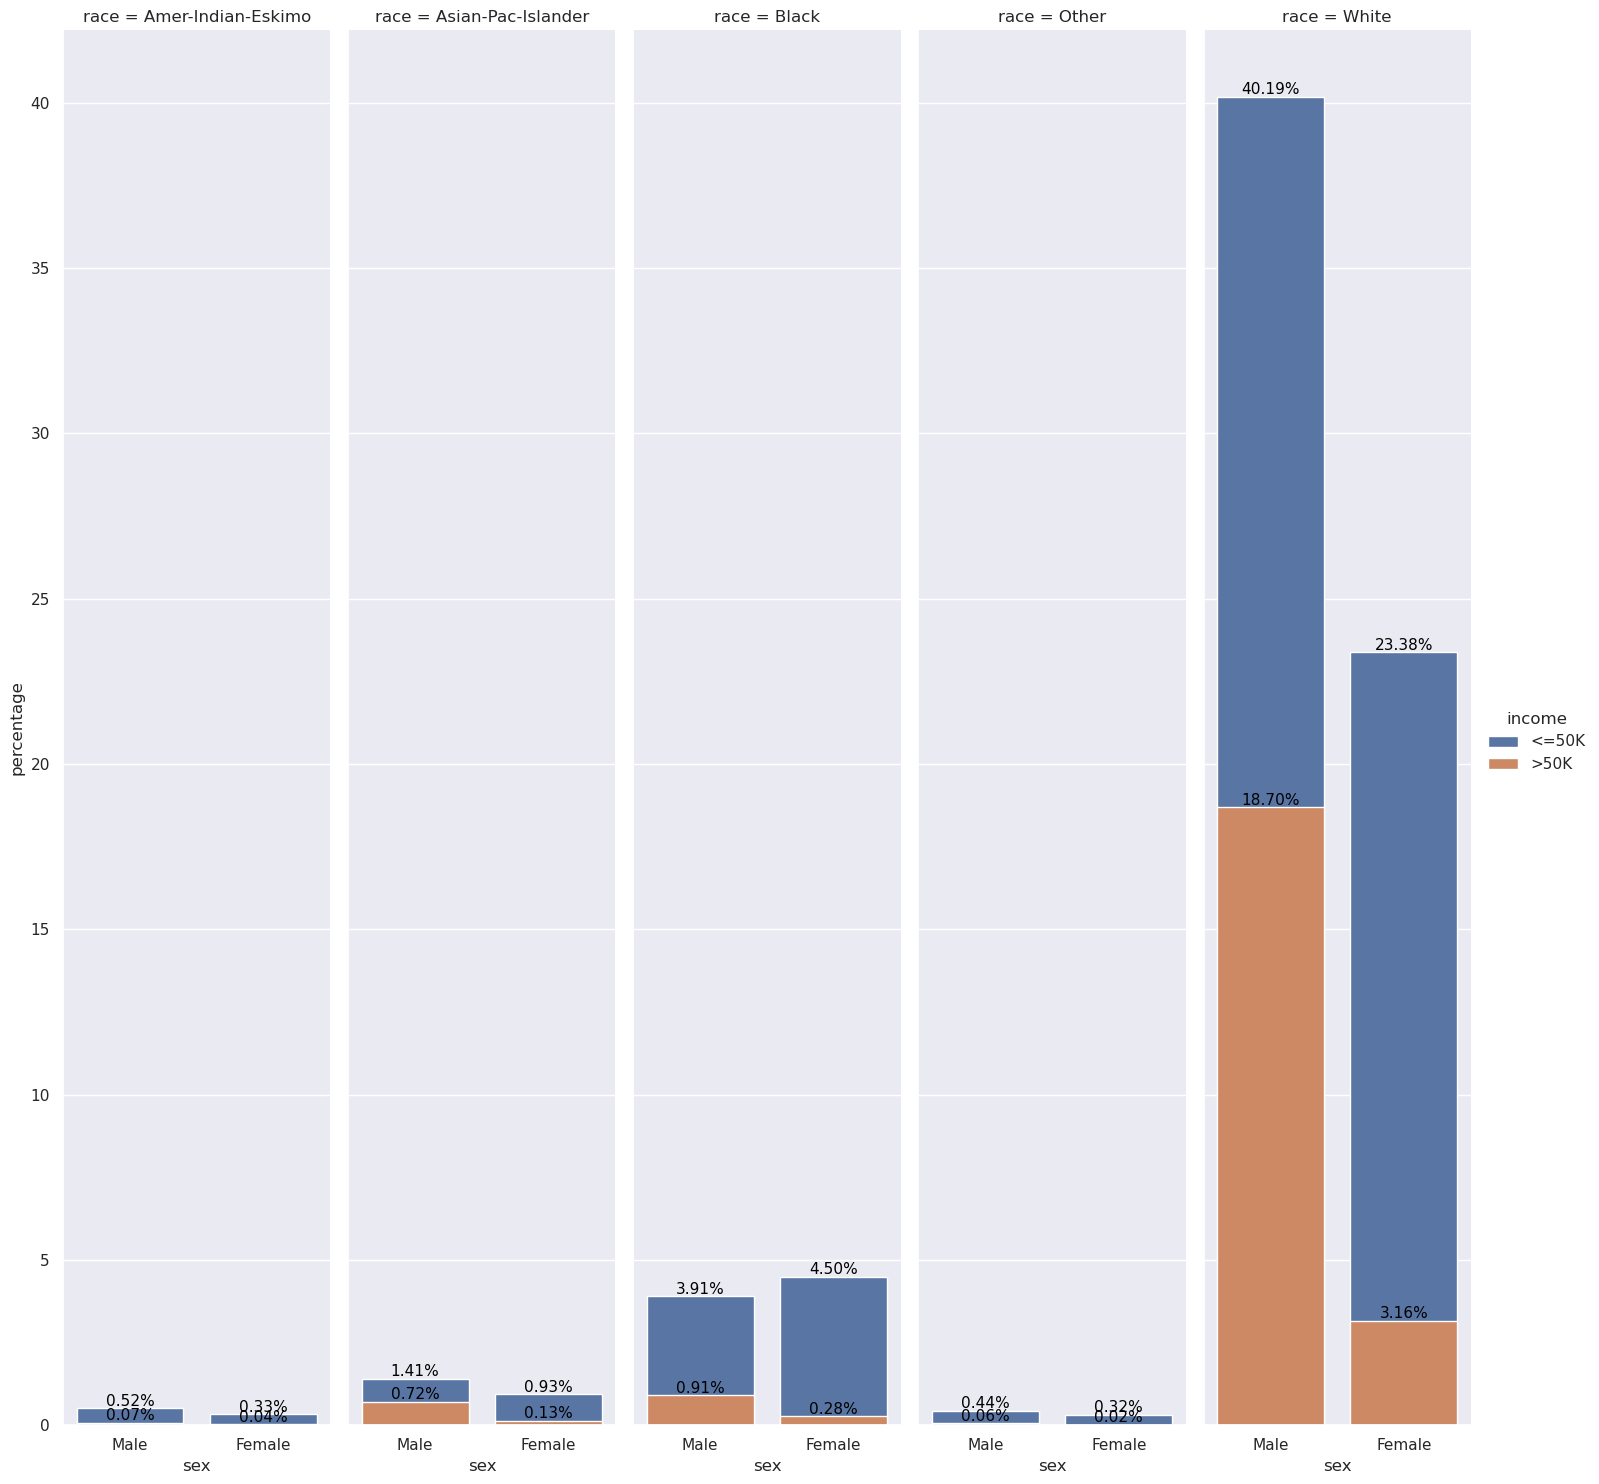

In [29]:
data12_df = (data[['race', 'sex', 'income']].value_counts() / len(data) * 100).to_frame()
data12_df.rename(columns={data12_df.columns[0]: "percentage" }, inplace = True)
data12_df = data12_df.reset_index()
data12_df = data12_df.sort_values(by=['race','sex'])
print(data12_df)
sns.set(rc={'figure.figsize':(6,10)})
g = sns.FacetGrid(data12_df, col="race", height=15, aspect=0.2, hue = 'income')
g.map(sns.barplot, "sex", "percentage", order=["Male", "Female"])
g.add_legend()
for ax in g.axes.ravel():
    for p in ax.patches:
             ax.annotate("%.2f%%" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                 textcoords='offset points')

<a href="#section-zero">Start of page</a>

<a id="section-four"></a>
# Imputing, Scaling and Feature Enginnering

The cells with '?' are replaced with 'missing' for one hot encoder

In [30]:
data_transformed = data.copy()
data_transformed = data_transformed.drop(['workclass', 'fnlwgt', 'education', 'occupation'], axis = 1)
data_transformed = data_transformed.replace('?', np.nan)

In [31]:
data_transformed['native.country'].value_counts(dropna = False)

United-States                 29170
Mexico                          643
NaN                             583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

native.country_nan column created for nan values

In [32]:
data_encoded = pd.get_dummies(data_transformed, columns = ['race','native.country','relationship','marital.status'], dummy_na = True)

In [33]:
data_encoded.head(3)

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,race_nan,native.country_Cambodia,native.country_Canada,native.country_China,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_Ecuador,native.country_El-Salvador,native.country_England,native.country_France,native.country_Germany,native.country_Greece,native.country_Guatemala,native.country_Haiti,native.country_Holand-Netherlands,native.country_Honduras,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,native.country_nan,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,relationship_nan,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,marital.status_nan
0,90,9,Female,0,4356,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,82,9,Female,0,4356,18,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,66,10,Female,0,4356,40,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [34]:
data_encoded = data_encoded.drop(['marital.status_nan', 'relationship_nan', 'race_nan'], axis = 1)

In [35]:
data_encoded.head(3)

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native.country_Cambodia,native.country_Canada,native.country_China,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_Ecuador,native.country_El-Salvador,native.country_England,native.country_France,native.country_Germany,native.country_Greece,native.country_Guatemala,native.country_Haiti,native.country_Holand-Netherlands,native.country_Honduras,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,native.country_nan,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed
0,90,9,Female,0,4356,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,82,9,Female,0,4356,18,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,66,10,Female,0,4356,40,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [36]:
data_encoded['native.country_nan'].value_counts()

0    31978
1      583
Name: native.country_nan, dtype: int64

All native.country one hot encoded columns are filled with nan for knn imputer:

In [37]:
for col in data_transformed.columns:
    if ('native.country' in col) and (col != 'native.country_nan'):
        missing_col = f'{col}_nan'
        data_encoded.loc[data_encoded[missing_col] == 1, data_encoded.columns.str.startswith(col)] = np.nan

In [38]:
data_encoded['Sex'] = data_encoded['sex'].apply(lambda x: 1 if x == 'Female' else 0)

In [39]:
data_encoded = data_encoded.drop(['sex', 'native.country_nan'], axis = 1)

Data is scaled: [0, 1]

In [40]:
data_encoded['income'] = data_encoded['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [41]:
data_normalized = (data_encoded - data_encoded.min()) / (data_encoded.max() - data_encoded.min())

In [42]:
data_normalized.head(3)

,age,education.num,capital.gain,capital.loss,hours.per.week,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native.country_Cambodia,native.country_Canada,native.country_China,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_Ecuador,native.country_El-Salvador,native.country_England,native.country_France,native.country_Germany,native.country_Greece,native.country_Guatemala,native.country_Haiti,native.country_Holand-Netherlands,native.country_Honduras,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,Sex
0,1.000000,0.533333,0.0,1.0,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.890411,0.533333,0.0,1.0,0.173469,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.671233,0.600000,0.0,1.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


sklearn's KNNImputer

In [43]:
imputer = KNNImputer(n_neighbors = 5, weights = 'distance') 
imputer.fit(data_normalized)

KNNImputer(weights='distance')

In [44]:
data_imputed = data_normalized.copy()
data_imputed = imputer.transform(data_normalized)

In [45]:
data_transformed2 = data_imputed.copy()
data_transformed2 = pd.DataFrame(data_imputed, columns = data_normalized.columns)

In [46]:
data_transformed2.tail(3)

,age,education.num,capital.gain,capital.loss,hours.per.week,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native.country_Cambodia,native.country_Canada,native.country_China,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_Ecuador,native.country_El-Salvador,native.country_England,native.country_France,native.country_Germany,native.country_Greece,native.country_Guatemala,native.country_Haiti,native.country_Holand-Netherlands,native.country_Honduras,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,Sex
32558,0.315068,0.533333,0.0,0.0,0.397959,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32559,0.561644,0.533333,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
32560,0.068493,0.533333,0.0,0.0,0.193878,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [47]:
country_cols = data_transformed2.columns[data_transformed2.columns.str.startswith('native.country')]

In [48]:
argmax_cols = data_transformed2[country_cols].idxmax(axis = 1)

In [49]:
data_transformed3 = data_transformed2.copy()
for col in country_cols:
    for i in range(len(data_transformed3)):
        if (argmax_cols[i] == col):
            data_transformed3.at[i, col] = 1
        else:
            data_transformed3.at[i, col] = 0

In [50]:
for col in country_cols:
    print(data_transformed3[col].value_counts())

0.0    32540
1.0       21
Name: native.country_Cambodia, dtype: int64
0.0    32439
1.0      122
Name: native.country_Canada, dtype: int64
0.0    32479
1.0       82
Name: native.country_China, dtype: int64
0.0    32502
1.0       59
Name: native.country_Columbia, dtype: int64
0.0    32466
1.0       95
Name: native.country_Cuba, dtype: int64
0.0    32489
1.0       72
Name: native.country_Dominican-Republic, dtype: int64
0.0    32531
1.0       30
Name: native.country_Ecuador, dtype: int64
0.0    32454
1.0      107
Name: native.country_El-Salvador, dtype: int64
0.0    32470
1.0       91
Name: native.country_England, dtype: int64
0.0    32532
1.0       29
Name: native.country_France, dtype: int64
0.0    32421
1.0      140
Name: native.country_Germany, dtype: int64
0.0    32532
1.0       29
Name: native.country_Greece, dtype: int64
0.0    32497
1.0       64
Name: native.country_Guatemala, dtype: int64
0.0    32514
1.0       47
Name: native.country_Haiti, dtype: int64
0.0    32560
1.0        1

In [51]:
data_transformed3.head(3)

,age,education.num,capital.gain,capital.loss,hours.per.week,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native.country_Cambodia,native.country_Canada,native.country_China,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_Ecuador,native.country_El-Salvador,native.country_England,native.country_France,native.country_Germany,native.country_Greece,native.country_Guatemala,native.country_Haiti,native.country_Holand-Netherlands,native.country_Honduras,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,Sex
0,1.000000,0.533333,0.0,1.0,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.890411,0.533333,0.0,1.0,0.173469,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.671233,0.600000,0.0,1.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [52]:
rest_cols = [col for col in data_transformed3.columns if col not in country_cols]

In [53]:
sns.set(font_scale  = 0.8)

Heatmap without country columns:

In [54]:
data_transformed3[rest_cols]

,age,education.num,capital.gain,capital.loss,hours.per.week,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,Sex
0,1.000000,0.533333,0.0,1.000000,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.890411,0.533333,0.0,1.000000,0.173469,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.671233,0.600000,0.0,1.000000,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.506849,0.200000,0.0,0.895317,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.328767,0.600000,0.0,0.895317,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,0.600000,0.0,0.000000,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32557,0.136986,0.733333,0.0,0.000000,0.377551,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32558,0.315068,0.533333,0.0,0.000000,0.397959,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32559,0.561644,0.533333,0.0,0.000000,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


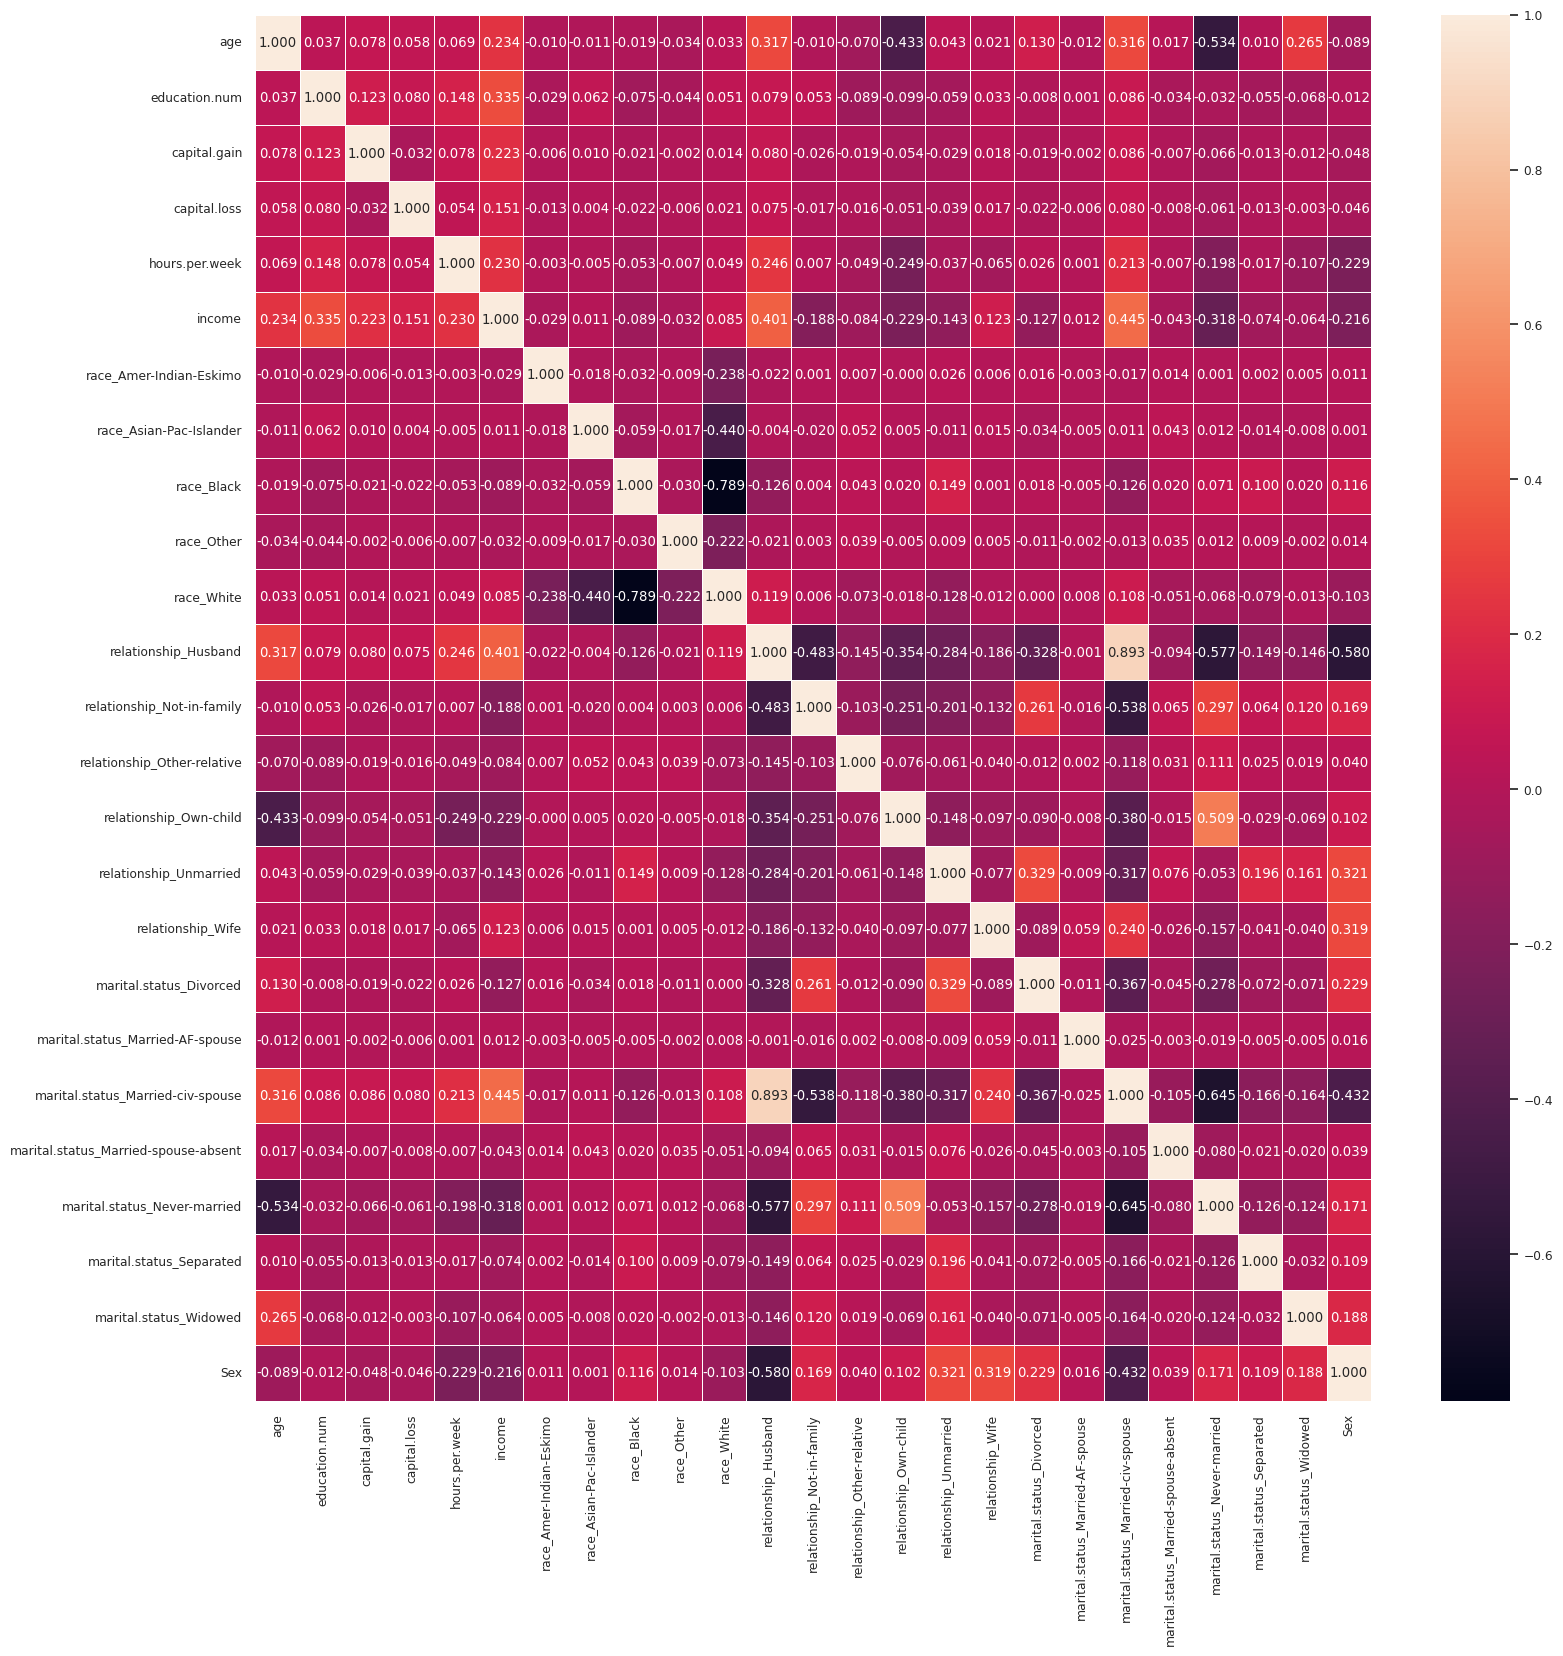

In [55]:
corr_data = data_transformed3[rest_cols].corr()
f21,ax21 = plt.subplots(figsize=(18, 18))
sns.heatmap(corr_data, annot=True, linewidths=.5, fmt= '.3f',ax=ax21)
plt.show()

In [56]:
sns.set(font_scale = 0.5)

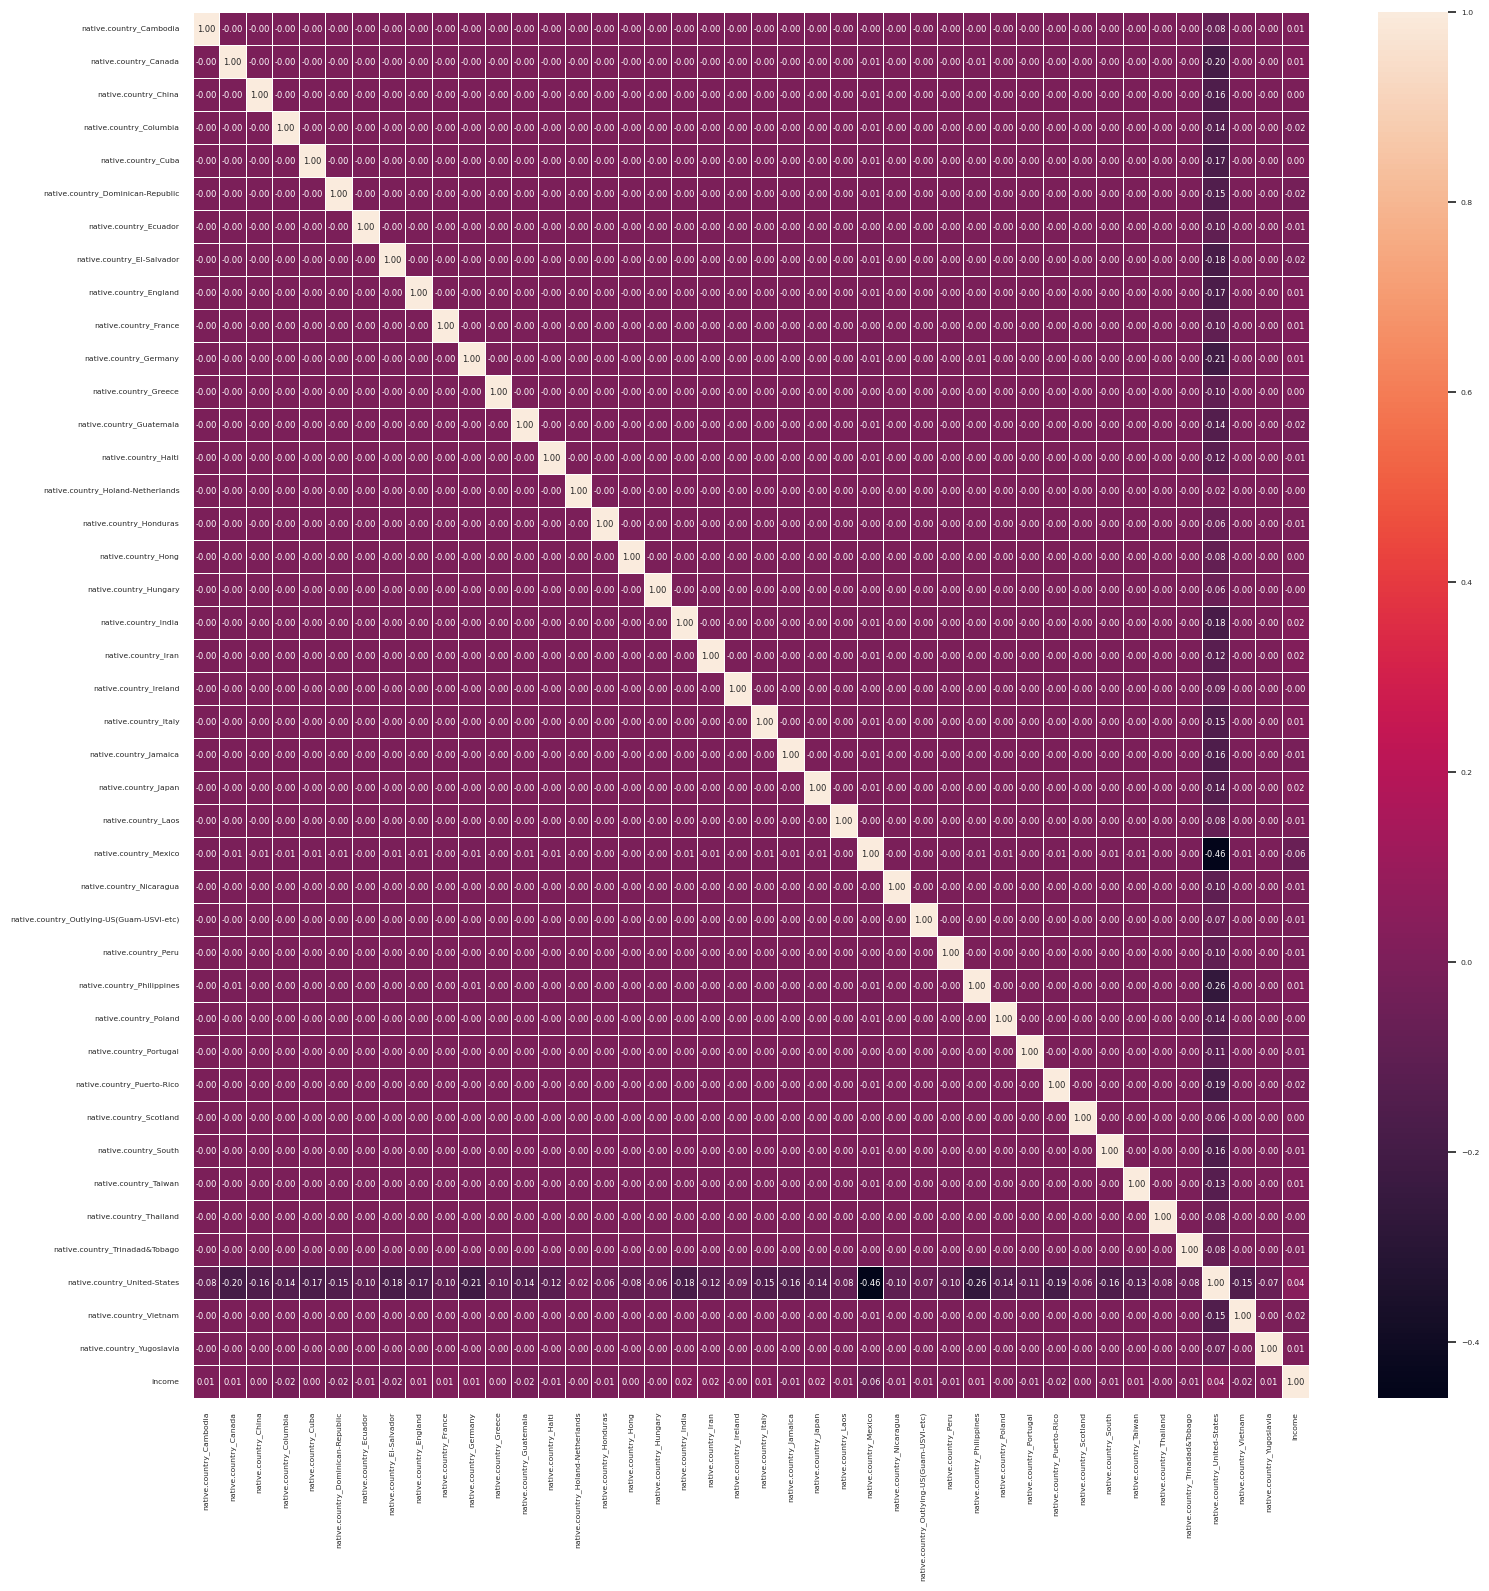

In [57]:
data_transformed4 = data_transformed3.copy()
data_transformed4 = data_transformed3[country_cols]
data_transformed4['income'] = data_transformed3['income']
corr_data2 = data_transformed4.corr()
f22,ax22 = plt.subplots(figsize=(18, 18))
sns.heatmap(corr_data2, annot=True, linewidths=.5, fmt= '.2f',ax=ax22)
plt.show()

In [58]:
y = data_transformed3['income']

In [59]:
X = data_transformed3.drop(['income'], axis = 1)

In [60]:
features = X.columns

In [61]:
mi_scores = []
for feature in features:
    mi_score =  mutual_info_classif(X[[feature]], y)
    print(feature, mi_score)
    mi_scores.append(mi_score)

age [0.06829617]
education.num [0.06218311]
capital.gain [0.08396412]
capital.loss [0.03606065]
hours.per.week [0.03851866]
race_Amer-Indian-Eskimo [0.00119283]
race_Asian-Pac-Islander [0.00024158]
race_Black [0.0069053]
race_Other [0]
race_White [0.00649609]
native.country_Cambodia [0.00397635]
native.country_Canada [0]
native.country_China [0]
native.country_Columbia [0.00021768]
native.country_Cuba [0.00132108]
native.country_Dominican-Republic [0.00260818]
native.country_Ecuador [0.00093134]
native.country_El-Salvador [0]
native.country_England [0]
native.country_France [0]
native.country_Germany [0]
native.country_Greece [0]
native.country_Guatemala [0.00175713]
native.country_Haiti [0]
native.country_Holand-Netherlands [0.00196672]
native.country_Honduras [0.00111442]
native.country_Hong [0.00105231]
native.country_Hungary [0]
native.country_India [0]
native.country_Iran [0]
native.country_Ireland [0.00310253]
native.country_Italy [0.00055196]
native.country_Jamaica [0]
native.co

In [62]:
features_df = pd.DataFrame(mi_scores, index = features)
features_df.columns = ['mi-index']
features_df.head(40)

,mi-index
age,0.068296
education.num,0.062183
capital.gain,0.083964
capital.loss,0.036061
hours.per.week,0.038519
race_Amer-Indian-Eskimo,0.001193
race_Asian-Pac-Islander,0.000242
race_Black,0.006905
race_Other,0.000000
race_White,0.006496


[Text(0.5, 1.0, 'Mutual Information Index')]

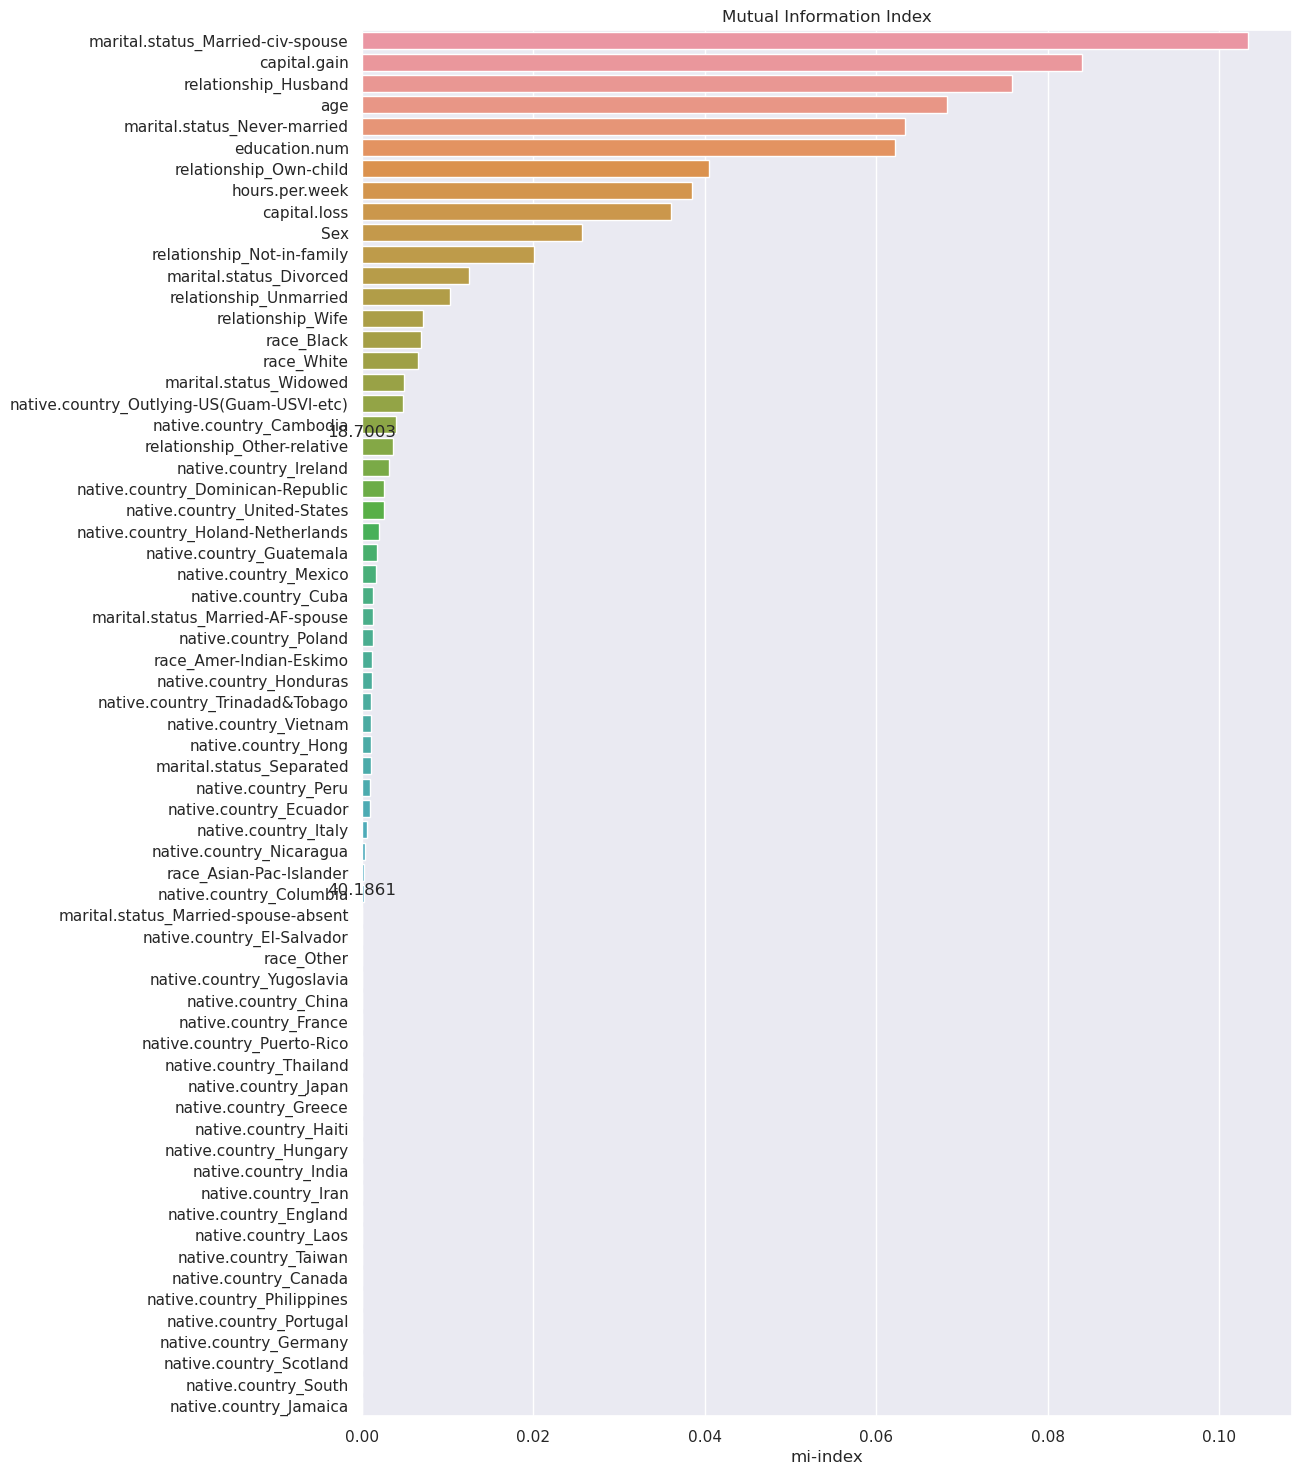

In [63]:
features_sorted = features_df.sort_values(by = 'mi-index', ascending = False)
sns.set(rc={'figure.figsize':(12,18)})
ax22 = sns.barplot(data = features_sorted, x = features_sorted['mi-index'], y = features_sorted.index)
for container in ax.containers:
    ax22.bar_label(container,)
ax22.set(title = 'Mutual Information Index')

<a href="#section-zero">Start of page</a>

<a id="section-five"></a>
# Modeling and Hyperparameter Tuning

Train 70%, validation 15%, test 15% split

In [64]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.176470588, random_state = 42)

In [65]:
model1 = KNeighborsClassifier(n_neighbors = 270)
model1.fit(X_train, y_train)
y_pred_valid1 = model1.predict(X_valid)
model1_accuracy = np.round(accuracy_score(y_valid, y_pred_valid1), 6)
print('Accuracy Score (k-nearest neighbors):', model1_accuracy)

Accuracy Score (k-nearest neighbors): 0.834152


In [66]:
model2 = LogisticRegression(random_state = 42)
model2.fit(X_train, y_train)
y_pred_valid2 = model2.predict(X_valid)
model2_accuracy = np.round(accuracy_score(y_valid, y_pred_valid2), 6)
print('Accuracy Score (Logistic Regression):', model2_accuracy)

Accuracy Score (Logistic Regression): 0.846233


In [67]:
model3 = SVC(kernel = 'poly', random_state = 42)
model3.fit(X_train, y_train)
y_pred_valid3 = model3.predict(X_valid)
model3_accuracy = np.round(accuracy_score(y_valid, y_pred_valid3), 6)
print('Accuracy Score (Support Vector Machine):', model3_accuracy)

Accuracy Score (Support Vector Machine): 0.84398


In [68]:
model4 = RandomForestClassifier(n_estimators = 2200, random_state = 42)
model4.fit(X_train, y_train)
y_pred_valid4 = model4.predict(X_valid)
model4_accuracy = np.round(accuracy_score(y_valid, y_pred_valid4), 6)
print('Accuracy Score (Random Forest):', model4_accuracy)

Accuracy Score (Random Forest): 0.845414


In [69]:
model5 = AdaBoostClassifier(n_estimators = 25000, learning_rate = 0.11, random_state = 42)
model5.fit(X_train, y_train)
y_pred_valid5 = model5.predict(X_valid)
model5_accuracy = np.round(accuracy_score(y_valid, y_pred_valid5), 6)
print('Accuracy Score (Ada Boost):', model5_accuracy)

Accuracy Score (Ada Boost): 0.871212


Parameters obtained by several runs of randomized search:

In [70]:
i1 = -2.2835
i2 = 10.616
i3 = 1.1289
i4 = 9.292
model6 = XGBClassifier(learning_rate = 10 ** (i1 / 2), max_depth = int(np.round(i2)), reg_lambda = 10 ** i3, 
                          n_estimators = int(10 ** (i4 / 4)), seed = 42)
model6.fit(X_train, y_train)
y_pred_valid6 = model6.predict(X_valid)
model6_accuracy = np.round(accuracy_score(y_valid, y_pred_valid6), 6)
print('Accuracy Score (XGBoost):', model6_accuracy)

Accuracy Score (XGBoost): 0.869574


In [71]:
i1 = -11.250666
i2 = 5.635880
i3 = 2.072460
i4 = 4.009552
i5 = 8.380405
i6 = 7.670860
i7 = 8.802374
model7 = LGBMClassifier(learning_rate = 10 ** (i1 / 10), num_iterations = np.int64(10 ** (i2 / 2)), 
                          reg_lambda = np.int64(10 ** (i3 / 2)),
                          n_estimators = np.int64(10 ** i4), max_depth = int(np.round(i5)), num_leaves = np.int64(10 ** (i6 / 4)), 
                          min_child_samples = np.int64(10 ** (i7 / 4)), verbose = -1, random_state = 42)
model7.fit(X_train, y_train)
y_pred_valid7 = model7.predict(X_valid)
model7_accuracy = np.round(accuracy_score(y_valid, y_pred_valid7), 6)
print('Accuracy Score (LightGBM):', model7_accuracy)

Accuracy Score (LightGBM): 0.869574


<a href="#section-zero">Start of page</a>

<a id="section-six"></a>
# Conclusion

In [72]:
report_df = pd.DataFrame(columns = ['Model', 'Test Accuracy'])

In [73]:
y_pred_test1 = model1.predict(X_test)
model1_test_accuracy = np.round(accuracy_score(y_test, y_pred_test1), 5)
print('Accuracy Score (k-nearest neighbors):', model1_test_accuracy)
row1 = ['k-nearest Neighbors', model1_test_accuracy]
report_df.loc[len(report_df)] = row1

Accuracy Score (k-nearest neighbors): 0.82907


In [74]:
y_pred_test2 = model2.predict(X_test)
model2_test_accuracy = np.round(accuracy_score(y_test, y_pred_test2), 5)
print('Accuracy Score (Logistic Regression):', model2_test_accuracy)
row2 = ['Logistic Regression', model2_test_accuracy]
report_df.loc[len(report_df)] = row2

Accuracy Score (Logistic Regression): 0.84012


In [75]:
y_pred_test3 = model3.predict(X_test)
model3_test_accuracy = np.round(accuracy_score(y_test, y_pred_test3), 5)
print('Accuracy Score (Support Vector Machine):', model3_test_accuracy)
row3 = ['Support Vector Machine', model3_test_accuracy]
report_df.loc[len(report_df)] = row3

Accuracy Score (Support Vector Machine): 0.84115


In [76]:
y_pred_test4 = model4.predict(X_test)
model4_test_accuracy = np.round(accuracy_score(y_test, y_pred_test4), 5)
print('Accuracy Score (Random Forest):', model4_test_accuracy)
row4 = ['Random Forest', model4_test_accuracy]
report_df.loc[len(report_df)] = row4

Accuracy Score (Random Forest): 0.84708


In [77]:
y_pred_test5 = model5.predict(X_test)
model5_test_accuracy = np.round(accuracy_score(y_test, y_pred_test5), 5)
print('Accuracy Score (Ada Boost):', model5_test_accuracy)
row5 = ['Ada Boost', model5_test_accuracy]
report_df.loc[len(report_df)] = row5

Accuracy Score (Ada Boost): 0.86714


In [78]:
y_pred_test6 = model6.predict(X_test)
model6_test_accuracy = np.round(accuracy_score(y_test, y_pred_test6), 5)
print('Accuracy Score (XGBoost):', model6_test_accuracy)
row6 = ['XGBoost', model6_test_accuracy]
report_df.loc[len(report_df)] = row6

Accuracy Score (XGBoost): 0.8651


In [79]:
y_pred_test7 = model7.predict(X_test)
model7_test_accuracy = np.round(accuracy_score(y_test, y_pred_test7), 5)
print('Accuracy Score (LightGBM):', model7_test_accuracy)
row7 = ['Light GBM', model7_test_accuracy]
report_df.loc[len(report_df)] = row7

Accuracy Score (LightGBM): 0.8651


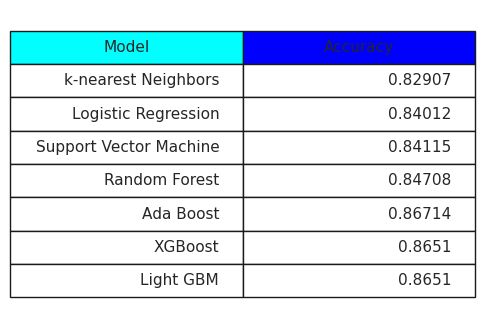

In [80]:
sns.set(rc={'figure.figsize':(3,4)})
table_df2 = report_df.copy()
fig2, ax2 = plt.subplots()
fig2.patch.set_visible(False)
ax2.axis('off')
ax2.axis('tight')
colcolours = ['cyan', 'blue']
table2 = ax2.table(cellText = table_df2.values, colLabels = ['Model', 'Accuracy'], loc='center', colColours = colcolours)
#fig2.tight_layout()
table2.set_fontsize(25)
table2.scale(2, 2)
table2.set
plt.show()

Boosting algorithms have the best test accuracy among all algorithms.

<a href="#section-zero">Start of page</a>

### License

This Notebook has been released under the Apache 2.0 open source license.